# **Week 0 Main Assignment**

### Read Lisan_Al_Gaib.pdf for problem description and complete the following functions

In [3]:
import time # to time the execution
import numpy as np
import matplotlib.pyplot as plt

In [8]:
### TODO 1
### Load data from data_path
### Check the input file spice_locations.txt to understand the Data Format
### Return : np array of size Nx2


def load_data(data_path):
    # Load spice location data (comma-separated)
    data = np.loadtxt(data_path, delimiter=",")
    return data


In [ ]:
### TODO 2.1
### If init_centers is None, initialize the centers by selecting K data points at random without replacement
### Else, use the centers provided in init_centers
### Return : np array of size Kx2


def initialise_centers(data, K, init_centers=None):
    if init_centers is None:
        # Randomly select K points from data without replacement
        indices = np.random.choice(data.shape[0], K, replace=False)
        centers = data[indices]
    else:
        # Use provided initial centers
        centers = init_centers

    return centers


In [ ]:
### TODO 2.2
### Initialize the labels to all ones to size (N,) where N is the number of data points
### Return : np array of size N


def initialise_labels(data):
    # Initialize all labels to 1 (size N, where N = number of data points)
    labels = np.ones(data.shape[0], dtype=int)
    return labels


In [9]:
### TODO 3.1 : E step
### For Each data point, find the distance to each center
### Return : np array of size NxK


def calculate_distances(data, centers):
    # Compute Euclidean distance from each data point to each center
    # data: (N, 2), centers: (K, 2) → distances: (N, K)
    distances = np.linalg.norm(
        data[:, None, :] - centers[None, :, :],
        axis=2
    )
    return distances


In [10]:
### TODO 3.2 : E step
### For Each data point, assign the label of the nearest center
### Return : np array of size N


def update_labels(distances):
    # Assign each data point to the nearest center
    labels = np.argmin(distances, axis=1)
    return labels


In [11]:
### TODO 4 : M step
### Update the centers to the mean of the data points assigned to it
### Return : np array of size Kx2


def update_centers(data, labels, K):
    # Create one-hot encoding for labels (N x K)
    one_hot = np.eye(K)[labels]
    
    # Compute new centers as mean of assigned points
    centers = (one_hot.T @ data) / one_hot.sum(axis=0)[:, None]
    
    return centers


In [12]:
### TODO 6 : Check convergence
### Check if the labels have changed from the previous iteration
### Return : True / False

def check_termination(labels1, labels2):
    # Check if labels have not changed between iterations
    return np.array_equal(labels1, labels2)


In [13]:
### DON'T CHANGE ANYTHING IN THE FOLLOWING FUNCTION
def kmeans(data_path:str, K:int, init_centers):
    data = load_data(data_path)    
    centers = initialise_centers(data, K, init_centers)
    labels = initialise_labels(data)

    start_time = time.time()

    while True:
        distances = calculate_distances(data, centers)
        labels_new = update_labels(distances)
        centers = update_centers(data, labels_new, K)
        if check_termination(labels, labels_new): break
        else: labels = labels_new
 
    end_time = time.time()
    return centers, labels, end_time - start_time


In [14]:
### TODO 7
import numpy as np
import matplotlib.pyplot as plt

def visualise(data_path, labels, centers):
    # Load data
    data = load_data(data_path)

    # Scatter plot of data points (colored by labels)
    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap="viridis", s=30)

    # Plot cluster centers
    plt.scatter(
        centers[:, 0],
        centers[:, 1],
        c="red",
        s=200,
        marker="X"
    )

    # Set title and labels
    plt.title("K-means clustering")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")

    # Save the plot
    plt.savefig("kmeans.png")
    plt.show()

    ## DO NOT CHANGE THE FOLLOWING LINE
    return plt


Time taken for the algorithm to converge: 0.0014026165008544922


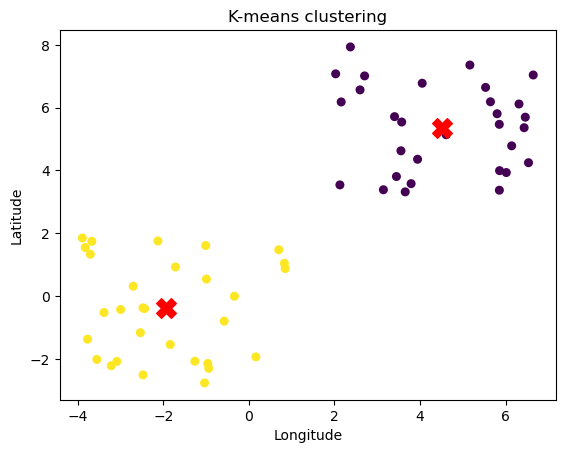

<module 'matplotlib.pyplot' from 'c:\\ProgramData\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

In [15]:
### After you have completed the above functions, run the following code to generate the plot
data_path = 'spice_locations (1) (1).txt'
K, init_centers = 2, None
centers, labels, time_taken = kmeans(data_path, K, init_centers)
print('Time taken for the algorithm to converge:', time_taken)
visualise(data_path, labels, centers)